importing the important library for our solution

In [1]:
import numpy as np
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt

define the ODE function

In [2]:
def ode_func(x, y):
    w, w1, w2, w3 = y 
    dydx = [w1, w2, w3, (10000 + 2.1 * w1**2 * w2) / (2520)] 
    return dydx

define the shooting method

In [3]:
def shooting_method(guess): 
    x_span = [0, 2] 
    y0 = [0, guess, 0, 0]
    sol = solve_ivp(ode_func, x_span, y0, t_eval=np.linspace(0, 2, 100))
    return sol.y[0][-1] -1

we are starting with a guess of 0 and solve the ODE with initiall guess

In [4]:
guess = 0
sol = solve_ivp(ode_func, [0, 2], [0, guess, 0, 0], t_eval=np.linspace(0, 2, 100))

Plot the solution of shooting method

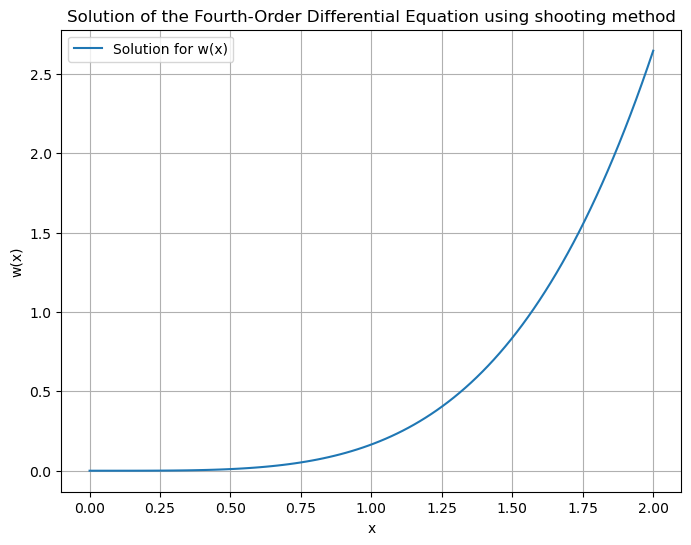

In [5]:
plt.figure(figsize=(8, 6)) 
plt.plot(sol.t, sol.y[0], label='Solution for w(x)') 
plt.xlabel('x')  
plt.ylabel('w(x)') 
plt.title('Solution of the Fourth-Order Differential Equation using shooting method') 
plt.grid(True) 
plt.legend() 
plt.show()

now we are defining the GDQ method

In [6]:
def gdq_method():
    N = 100
    x = np.linspace(0, 2, N)
    h = x[1] - x[0] 
    
    # Initialize arrays
    w = np.zeros(N) 
    w1 = np.zeros(N) 
    w2 = np.zeros(N) 
    w3 = np.zeros(N) 
    
    # Initial conditions
    w[0] = 0 
    w1[0] = 0 
    w2[0] = 0 
    w3[0] = 0 
    
    # Solve the differential equation using GDQ 
    for i in range(1, N):
        w[i] = w[i-1] + h * w1[i-1] 
        w1[i] = w1[i-1] + h * w2[i-1] 
        w2[i] = w2[i-1] + h * w3[i-1] 
        w3[i] = w3[i-1] + h * ((10000 + 2.1 * w1[i-1]**2 * w2[i-1]) / (2520)) 
        
    return x, w

solving with GDQ

In [7]:
x2, w = gdq_method()

plot the solution

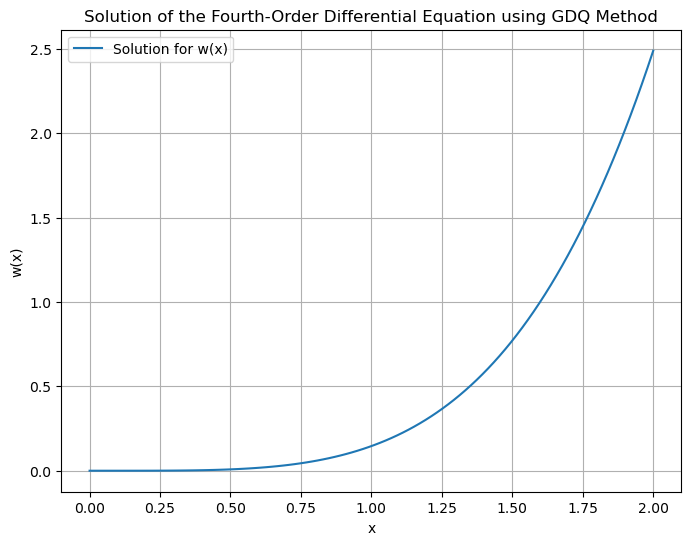

In [8]:
plt.figure(figsize=(8, 6)) 
plt.plot(x2, w, label='Solution for w(x)') 
plt.xlabel('x') 
plt.ylabel('w(x)') 
plt.title('Solution of the Fourth-Order Differential Equation using GDQ Method') 
plt.grid(True) 
plt.legend() 
plt.show()